# COVID-19 Analysis

This project focuses on data visualization to derive assumptions on coronavirus data. Inspired by current events.

In [226]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning

In [227]:
data = pd.read_csv("resources/covid_states.csv")

In [228]:
data.head()

# I looked through the csv file manually and selected the columns that I felt were more critical to the analysis
# Obviously the gravity of the column's importance can be different for someone else
# So I encourage others to download the resource first

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [229]:
# Taking specific columns from the entire dataset

covid = data[['date', 'state', 'positive', 'negative', 'positiveIncrease', 'totalTestResults',
             'hospitalizedCurrently', 'hospitalizedCumulative', 'hospitalizedIncrease',
             'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 
             'deathConfirmed', 'deathIncrease', 'dataQualityGrade']]
covid.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
0,20201206,AK,35720.0,1042056.0,757,1077776.0,164.0,799.0,0,21.0,NaN,7165.0,143.0,0,A
1,20201206,AL,269877.0,1421126.0,2288,1645041.0,1927.0,26331.0,0,NaN,1317.0,168387.0,3462.0,12,A
2,20201206,AR,170924.0,1614979.0,1542,1763150.0,1076.0,9401.0,21,179.0,1038.0,149490.0,2437.0,40,A+
3,20201206,AS,0.0,2140.0,0,2140.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,D
4,20201206,AZ,364276.0,2018813.0,5376,2370499.0,2977.0,28248.0,242,462.0,NaN,56382.0,6431.0,25,A+


In [230]:
# Convert the date field to a string for reformatting
covid = covid.astype({"date": str})

# Create a set <> list of all values in the date column
date_set = list(set(covid['date']))

# Loop through the list to replace that value in the dataframe
for i in date_set:
    reformat = i[4:6] + "/" + i[6:] + "/" + i[0:4]
    covid["date"].replace(i, reformat, inplace=True)

In [231]:
# Convert the date column into a datetime type
covid['date'] = pd.to_datetime(covid['date'])
covid.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
0,2020-12-06,AK,35720.0,1042056.0,757,1077776.0,164.0,799.0,0,21.0,NaN,7165.0,143.0,0,A
1,2020-12-06,AL,269877.0,1421126.0,2288,1645041.0,1927.0,26331.0,0,NaN,1317.0,168387.0,3462.0,12,A
2,2020-12-06,AR,170924.0,1614979.0,1542,1763150.0,1076.0,9401.0,21,179.0,1038.0,149490.0,2437.0,40,A+
3,2020-12-06,AS,0.0,2140.0,0,2140.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,D
4,2020-12-06,AZ,364276.0,2018813.0,5376,2370499.0,2977.0,28248.0,242,462.0,NaN,56382.0,6431.0,25,A+


### Let's test the dataset by drawing a graph showing the basic timeline of COVID Tests throughout 2020

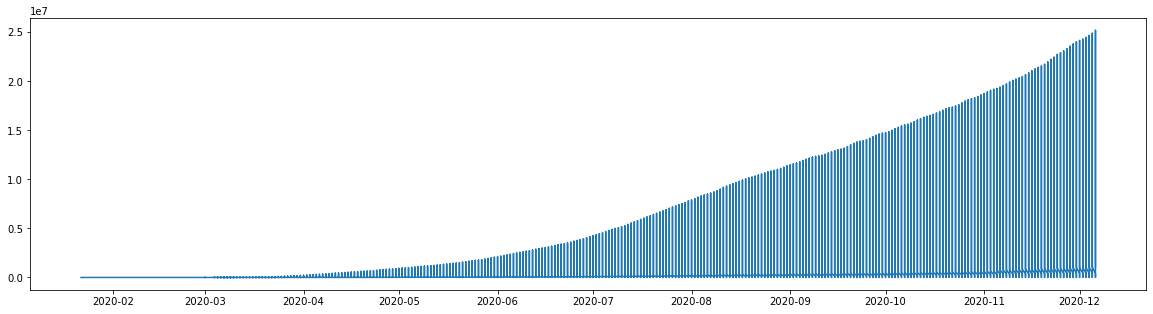

In [240]:
plt.figure(figsize=(20,5))
plt.plot(covid['date'], covid['totalTestResults'])

### Number of deaths overtime

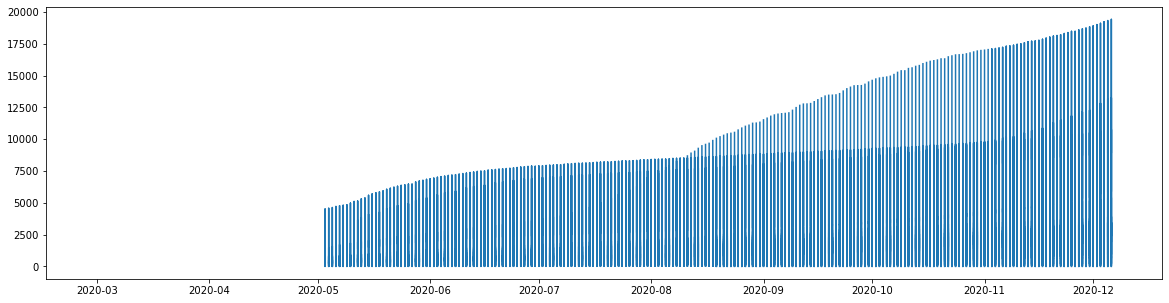

In [242]:
plt.figure(figsize=(20,5))
plt.plot(covid["date"], covid["deathConfirmed"])

It seems that the dataset did not start recording the death toll until May 2020. Also notice the spike in deaths around August 2020. Note:

* This does not necessarily mean that COVID spiked in August. Rather it means the disease seemed to be more potent or apparent. 
* The deaths had a gradual increase after August 2020. Could this be a cause of COVID-19 becoming more difficult to stop or a general ignorance of civillian care to the pandemic?